## Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pandas_profiling import ProfileReport

## Helper Functions

In [2]:
# Function to plot graphs titles and labels 
def info_plot(title, xlabel, ylabel):
    plt.title(title, fontsize = 18)
    plt.xlabel(xlabel, fontsize = 14)
    plt.ylabel(ylabel, fontsize = 14)

# Function to plot values upside the barplot
def annot_plot(plot):
    for p in plot.patches:
        plot.annotate(format(int(p.get_height())), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 9), 
                       textcoords = 'offset points',
                       fontsize = 14)
    return None

def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use('bmh')
    plt.rcParams['figure.figsize'] = [16, 10]
    plt.rcParams['font.size'] = 18
    
    #display(HTML('<style>.container {width:100% !important;}</style'))
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option('display.expand_frame_repr', False)
    
    sns.set()
    
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


## Load Datasets

In [3]:
df_houses = pd.read_csv('../data/df_houses_full_cleanned.csv')
df_venues = pd.read_csv('../data/nearby_venues_full_cleanned.csv')

# 1.0 Exploratory Data Analyse - EDA

## 1.1 df_houses

In [4]:
print(f'The dataset "df_houses" has {df_houses.shape[0]} rows and {df_houses.shape[1]} columns.')

The dataset "df_houses" has 1670 rows and 11 columns.


In [21]:
df_houses.drop_duplicates(inplace = True)

In [22]:
df_houses.head()

,house_id,scrapy_datetime,city,street,size,pets,montly_rent,deposit_value,m2_value,lat,long
0,1719697,2021-05-13 12:16:03,Berlin,Nürnberger Straße,22.0,Pets not allowed,850,1700,38.636364,52.50027,13.33596
1,1716752,2021-05-13 12:16:05,Berlin,Schnellerstraße,90.0,Pets not allowed,450,900,5.000000,52.45495,13.51636
2,1716755,2021-05-13 12:16:07,Berlin,Schnellerstraße,90.0,Pets not allowed,475,950,5.277778,52.45495,13.51636
3,1724139,2021-05-13 12:16:09,Berlin,Otto-Braun-Straße,25.0,Pets not allowed,760,500,30.400000,52.52449,13.41863
4,1721869,2021-05-13 12:16:11,Berlin,Otto-Braun-Straße,25.0,Pets not allowed,760,500,30.400000,52.52449,13.41863


In [23]:
df_houses.dtypes

house_id                    int64
scrapy_datetime    datetime64[ns]
city                       object
street                     object
size                      float64
pets                       object
montly_rent                 int64
deposit_value               int64
m2_value                  float64
lat                       float64
long                      float64
dtype: object

In [24]:
df_houses['scrapy_datetime'] = pd.to_datetime(df_houses['scrapy_datetime'])

In [25]:
df_houses.describe(include = 'all').T

<ipython-input-25-18e255f7c438>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_houses.describe(include = 'all').T


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
house_id,1670.0,NaN,NaN,NaN,NaT,NaT,1654843.155689,117069.471715,7022.0,1650309.25,1692095.0,1714294.25,1724698.0
scrapy_datetime,1670,1670,2021-05-13 12:27:20,1,2021-05-13 12:16:03,2021-05-13 13:22:36,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city,1670,11,Berlin,600,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
street,1670,681,Wielandstraße,91,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
size,1670.0,NaN,NaN,NaN,NaT,NaT,56.083191,138.955278,15.0,33.0,47.0,63.75,4000.0
pets,1670,3,Pets not allowed,1101,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
montly_rent,1670.0,NaN,NaN,NaN,NaT,NaT,1587.674251,787.381348,350.0,1050.0,1400.0,1860.0,6490.0
deposit_value,1670.0,NaN,NaN,NaN,NaT,NaT,1612.657485,1284.200416,0.0,690.0,1500.0,2250.0,9990.0
m2_value,1670.0,NaN,NaN,NaN,NaT,NaT,33.504605,14.407509,0.2475,24.413475,30.434783,39.358836,143.333333
lat,1670.0,NaN,NaN,NaN,NaT,NaT,51.329168,1.685677,48.03293,50.11106,51.934285,52.52614,53.70151


In [26]:
# Pandas Profile Report
df_houses_report = ProfileReport(df_houses, 'Houses for Rent in Germany.')

# Saving the report to further use.
df_houses_report.to_file(output_file = '../reports/df_houses_report.html')

Summarize dataset:   0%|          | 0/19 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [27]:
df_houses_report

### 1.1.1 Univariated Analysis

#### Montly Rent

C:\Users\felip\Anaconda3\envs\PA05\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


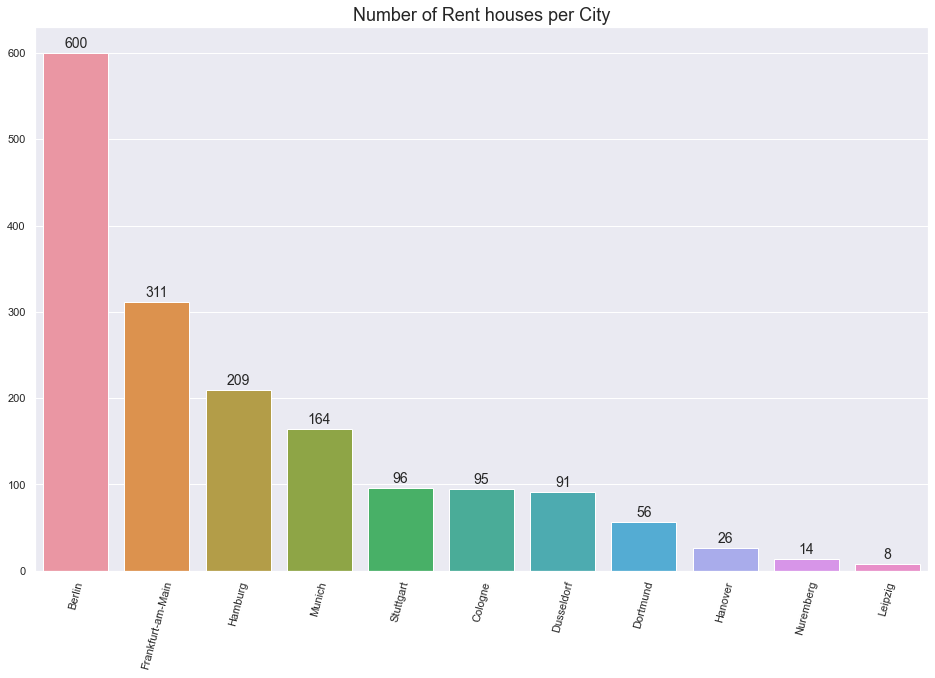

In [28]:
# count plot - number of rent houses offer per city.
ax = sns.barplot(df_houses['city'].value_counts().keys(), y = df_houses['city'].value_counts().values)
plt.title('Number of Rent houses per City', fontsize = 18)
plt.xticks(rotation=75)
annot_plot(ax)
ax.figure.savefig(r'../images/rent_houses_per_city.png')

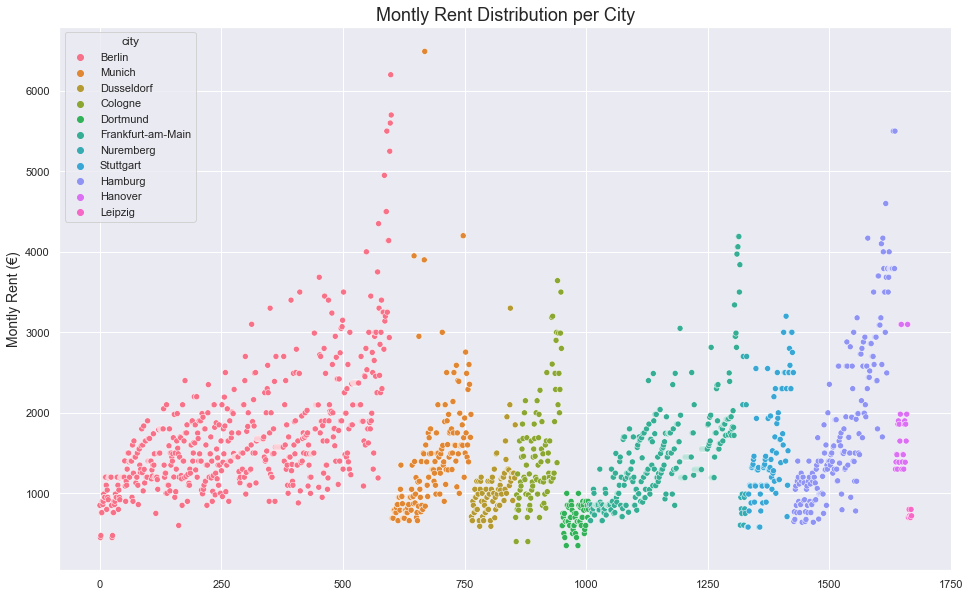

In [29]:
ax = sns.scatterplot(x = df_houses.index, y = 'montly_rent', hue = 'city', data = df_houses)
plt.title('Montly Rent Distribution per City', fontsize = 18)
plt.ylabel('Montly Rent (€)', fontsize = 14)
ax.figure.savefig(r'../images/montly_rent_per_city.png')

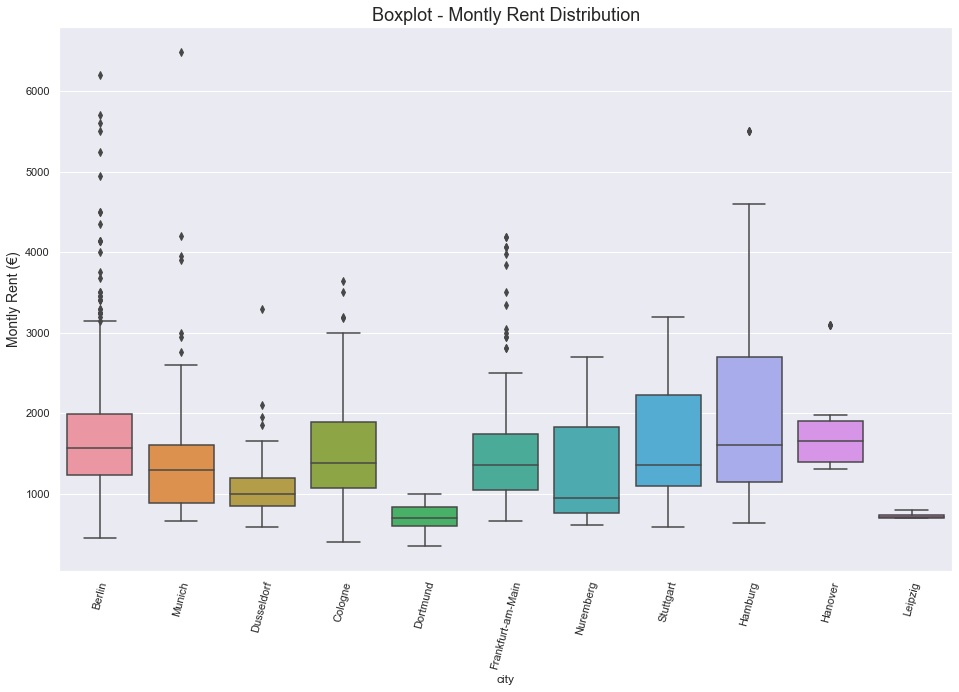

In [30]:
ax = sns.boxplot(x = 'city', y = 'montly_rent', data = df_houses)
plt.title('Boxplot - Montly Rent Distribution', fontsize = 18)
plt.ylabel('Montly Rent (€)', fontsize = 14)
plt.xticks(rotation=75);
ax.figure.savefig(r'../images/boxplot_rent_distrition_per_city.png')

In [41]:
# Check for outliers
# Montly rent max value
display(df_houses[df_houses['montly_rent'] > 4000])

# Montly rent min value
display(df_houses[df_houses['montly_rent'] < 400])

,house_id,scrapy_datetime,city,street,size,pets,montly_rent,deposit_value,m2_value,lat,long
573,1655508,2021-05-13 12:37:29,Berlin,Choriner Straße,104.0,Pets not allowed,4350,0,41.826923,52.53104,13.40576
585,1655509,2021-05-13 12:38:00,Berlin,Choriner Straße,118.0,Pets not allowed,4950,0,41.949153,52.53104,13.40576
588,1678219,2021-05-13 12:38:11,Berlin,Höchste Straße,130.0,Pets negotiable,4500,0,34.615385,52.52527,13.42816
589,1678216,2021-05-13 12:38:13,Berlin,Höchste Straße,130.0,Pets negotiable,4500,0,34.615385,52.52527,13.42816
590,1655510,2021-05-13 12:38:15,Berlin,Choriner Straße,132.0,Pets not allowed,5500,0,41.666667,52.53104,13.40576
592,1659727,2021-05-13 12:38:19,Berlin,Kurfürstendamm,113.0,Pets not allowed,4140,1200,36.637168,52.50208,13.32437
593,1659719,2021-05-13 12:38:21,Berlin,Kurfürstendamm,113.0,Pets not allowed,4140,1200,36.637168,52.50208,13.32437
594,1659714,2021-05-13 12:38:23,Berlin,Kurfürstendamm,113.0,Pets not allowed,4140,1200,36.637168,52.50208,13.32437
596,1599619,2021-05-13 12:38:28,Berlin,Winterfeldtstraße,65.0,Pets not allowed,5250,0,80.769231,52.49589,13.36026
597,1699961,2021-05-13 12:38:30,Berlin,Perleberger Straße,180.0,Pets not allowed,5600,4500,31.111111,52.53342,13.35204


,house_id,scrapy_datetime,city,street,size,pets,montly_rent,deposit_value,m2_value,lat,long
959,7022,2021-05-13 12:53:18,Dortmund,Unterm Kolm,27.0,Pets not allowed,350,350,12.962963,51.438539,7.231075
983,7022,2021-05-13 12:54:09,Dortmund,Unterm Kolm,27.0,Pets not allowed,350,350,12.962963,51.438539,7.231075


#### m² value

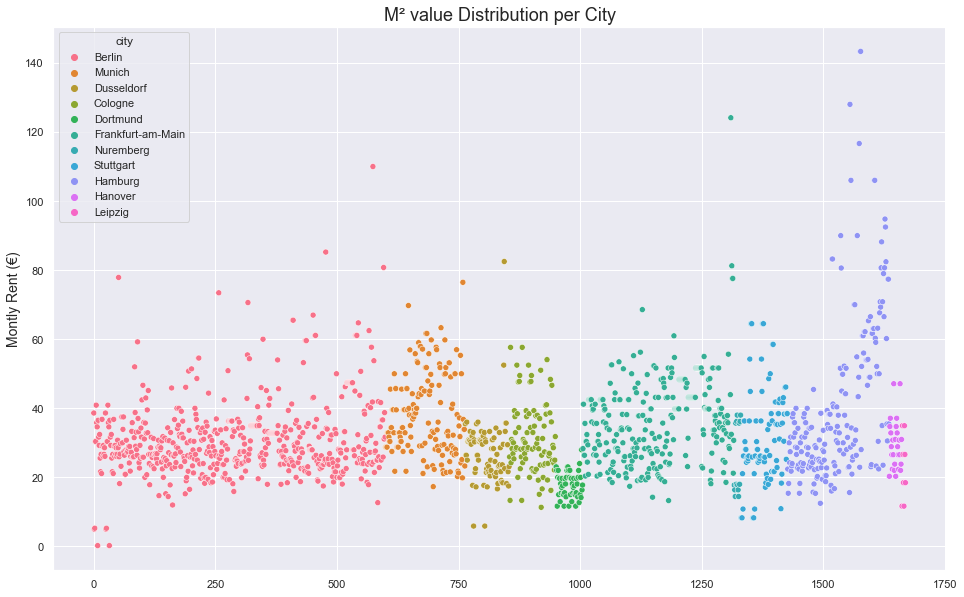

In [32]:
# Average m2 value dsitribution per city
ax = sns.scatterplot(x = df_houses.index, y = 'm2_value', hue = 'city', data = df_houses)
plt.title('M² value Distribution per City', fontsize = 18)
plt.ylabel('Montly Rent (€)', fontsize = 14)
ax.figure.savefig(r'../images/m2_distribution_per_city.png')

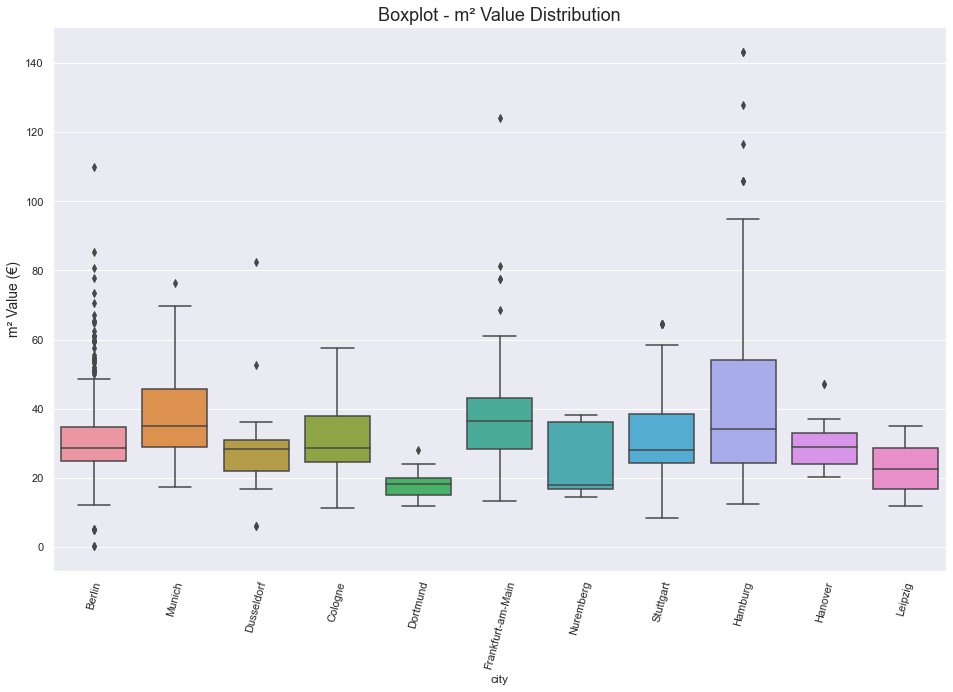

In [33]:
ax = sns.boxplot(x = 'city', y = 'm2_value', data = df_houses)
plt.title('Boxplot - m² Value Distribution', fontsize = 18)
plt.ylabel('m² Value (€)', fontsize = 14)
plt.xticks(rotation=75);
ax.figure.savefig(r'../images/boxplot_2_value_distrition_per_city.png')

In [39]:
# Check for outliers
# Montly rent max value
display(df_houses[df_houses['m2_value'] > 100])

# Montly rent min value
display(df_houses[df_houses['m2_value'] < 5])

,house_id,scrapy_datetime,city,street,size,pets,montly_rent,deposit_value,m2_value,lat,long
574,1599615,2021-05-13 12:37:31,Berlin,Winterfeldtstraße,30.0,Pets not allowed,3300,0,110.000000,52.49589,13.36026
1310,1715055,2021-05-13 13:06:56,Frankfurt-am-Main,Lohweg,32.0,Pets negotiable,3972,0,124.125000,50.11731,8.80981
1555,1681928,2021-05-13 13:17:10,Hamburg,Ohechaussee,15.0,Pets negotiable,1920,0,128.000000,53.66702,9.97675
1557,1681269,2021-05-13 13:17:15,Hamburg,Königstraße,30.0,Pets negotiable,3180,0,106.000000,53.54848,9.94497
1574,1681925,2021-05-13 13:17:51,Hamburg,Ohechaussee,18.0,Pets negotiable,2100,0,116.666667,53.66702,9.97675
1576,1681260,2021-05-13 13:17:59,Hamburg,Königstraße,18.0,Pets negotiable,2580,0,143.333333,53.54848,9.94497
1577,1681259,2021-05-13 13:18:01,Hamburg,Königstraße,18.0,Pets negotiable,2580,0,143.333333,53.54848,9.94497
1605,1681272,2021-05-13 13:19:03,Hamburg,Königstraße,30.0,Pets negotiable,3180,0,106.000000,53.54848,9.94497
1606,1681271,2021-05-13 13:19:05,Hamburg,Königstraße,30.0,Pets negotiable,3180,0,106.000000,53.54848,9.94497


,house_id,scrapy_datetime,city,street,size,pets,montly_rent,deposit_value,m2_value,lat,long
8,1699607,2021-05-13 12:16:19,Berlin,Takustraße,4000.0,Pets negotiable,990,0,0.2475,52.45695,13.29344
32,1699607,2021-05-13 12:17:12,Berlin,Takustraße,4000.0,Pets negotiable,990,0,0.2475,52.45695,13.29344


In [35]:
df_houses.head()

,house_id,scrapy_datetime,city,street,size,pets,montly_rent,deposit_value,m2_value,lat,long
0,1719697,2021-05-13 12:16:03,Berlin,Nürnberger Straße,22.0,Pets not allowed,850,1700,38.636364,52.50027,13.33596
1,1716752,2021-05-13 12:16:05,Berlin,Schnellerstraße,90.0,Pets not allowed,450,900,5.000000,52.45495,13.51636
2,1716755,2021-05-13 12:16:07,Berlin,Schnellerstraße,90.0,Pets not allowed,475,950,5.277778,52.45495,13.51636
3,1724139,2021-05-13 12:16:09,Berlin,Otto-Braun-Straße,25.0,Pets not allowed,760,500,30.400000,52.52449,13.41863
4,1721869,2021-05-13 12:16:11,Berlin,Otto-Braun-Straße,25.0,Pets not allowed,760,500,30.400000,52.52449,13.41863


In [36]:
grouped_cities = df_houses.groupby('city')['size', 'montly_rent', 'deposit_value', 'm2_value'].mean().reset_index()

<ipython-input-36-0193e5f47aa0>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_cities = df_houses.groupby('city')['size', 'montly_rent', 'deposit_value', 'm2_value'].mean().reset_index()


In [37]:
grouped_cities

,city,size,montly_rent,deposit_value,m2_value
0,Berlin,72.903982,1733.248333,1912.448333,30.976192
1,Cologne,52.368421,1550.326316,2035.726316,31.569389
2,Dortmund,40.892857,701.000000,1019.142857,17.947117
3,Dusseldorf,42.416484,1068.604396,1067.802198,27.387048
4,Frankfurt-am-Main,43.248553,1464.932476,1939.575563,36.860512
5,Hamburg,51.662871,1993.263158,1141.296651,42.024130
6,Hanover,66.076923,1829.615385,1338.461538,29.549513
7,Leipzig,37.250000,729.500000,225.000000,22.927885
8,Munich,40.465854,1417.103659,1382.743902,38.034892
9,Nuremberg,50.385714,1271.428571,796.000000,25.223392


### 1.1.2 Bivariate Analysis